In [21]:
%matplotlib notebook
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from utils.data import fetch_data, generate_data, int_to_label
from utils.distances import p_norm_distance, cos_distance
from utils.clustering import agg_clustering
from utils.plotting import plot
from utils.encoding import power, make_good_unitary, encode_point, encode_dataset
from utils.hrr import random_vectors

#  p-norm clustering

In [22]:
logfile_path = ['../data/raw/1599166289/data.pickle']
coord_nut, coord_bolt = fetch_data(logfile_path)

p_distance_bolt = p_norm_distance(coord_bolt, p = -3)
p_distance_nut = p_norm_distance(coord_nut, p = -3)

thres = 0.8
estimated_labels_bolt = agg_clustering(coord_bolt, 'cosine', thres)
estimated_labels_nut = agg_clustering(coord_nut, 'cosine', thres)

In [32]:
max(estimated_labels_bolt)

1

In [33]:
max(estimated_labels_nut)

1

<IPython.core.display.Javascript object>


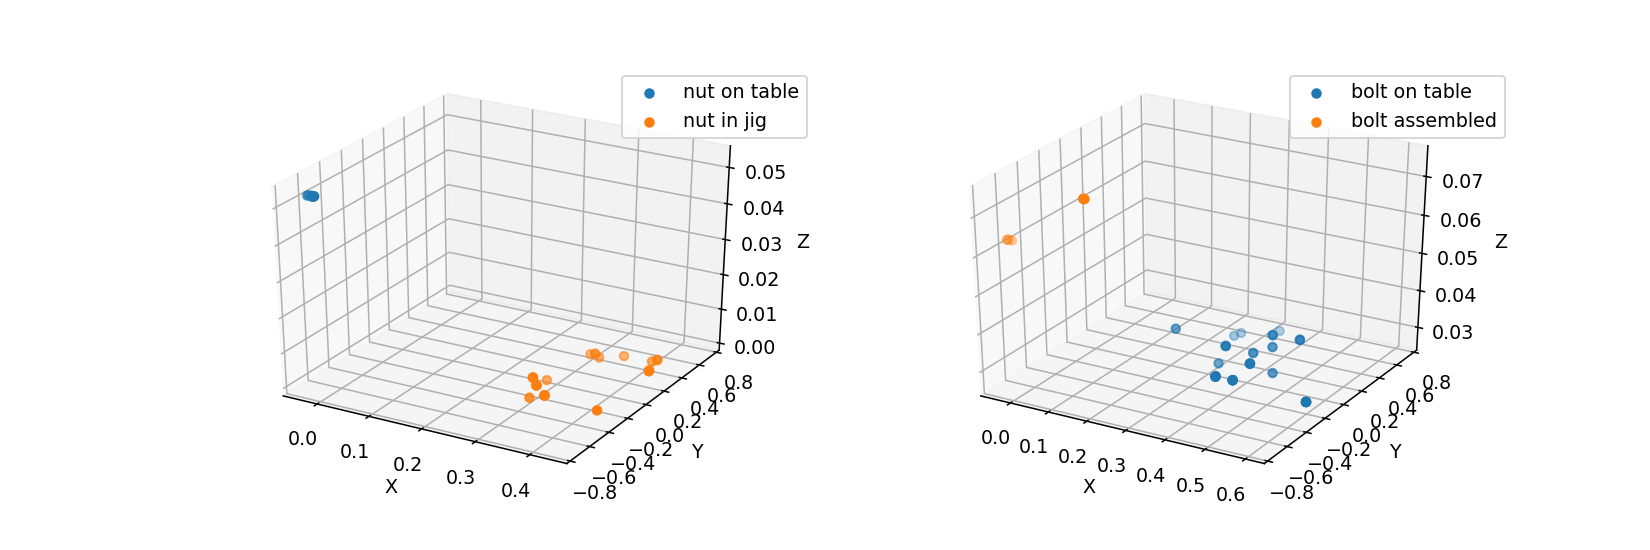

In [34]:
labels_bolt = ['bolt on table', 'bolt assembled', 'bolt in jig']
labels_nut = ['nut in jig', 'nut on table']

estimated_labels_nut = int_to_label(estimated_labels_nut, labels_nut)
estimated_labels_bolt = int_to_label(estimated_labels_bolt, labels_bolt)

fig = plt.figure(1, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut, estimated_labels_nut)
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot(ax, coord_bolt, estimated_labels_bolt)
plt.savefig('../figures/p_norm_clustering')

# SSP encoding

In [4]:
dim = 256

x_axis_sp = make_good_unitary(dim)
y_axis_sp = make_good_unitary(dim)
z_axis_sp = make_good_unitary(dim)

bolt_ssp = encode_dataset(coord_bolt, x_axis_sp, y_axis_sp, z_axis_sp)
bolt_ssp_p_norm_distance = p_norm_distance(bolt_ssp, p = -15)
bolt_ssp_euclidean_distance = p_norm_distance(bolt_ssp, p = 2)
bolt_ssp_cos_distance = cos_distance(bolt_ssp)

nut_ssp = encode_dataset(coord_nut, x_axis_sp, y_axis_sp, z_axis_sp)
nut_ssp_p_norm_distance = p_norm_distance(nut_ssp, p = -15)
nut_ssp_euclidean_distance = p_norm_distance(nut_ssp, p = 2)
nut_ssp_cos_distance = cos_distance(nut_ssp)

..\utils\distances.py:10: RuntimeWarning: divide by zero encountered in power
  distances[i,j] = np.sum(difference ** p) ** (1 / p)


## P_norm distance

In [8]:
thres = 0.00019

bolt_ssp_p_norm_clustering = clustering(bolt_ssp_p_norm_distance, thres)
nut_ssp_p_norm_clustering = clustering(nut_ssp_p_norm_distance, thres)


In [9]:
bolt_ssp_p_norm_clustering.shape

(48,)

In [10]:
print( max(nut_ssp_p_norm_clustering),max(bolt_ssp_p_norm_clustering))

2 1


<IPython.core.display.Javascript object>


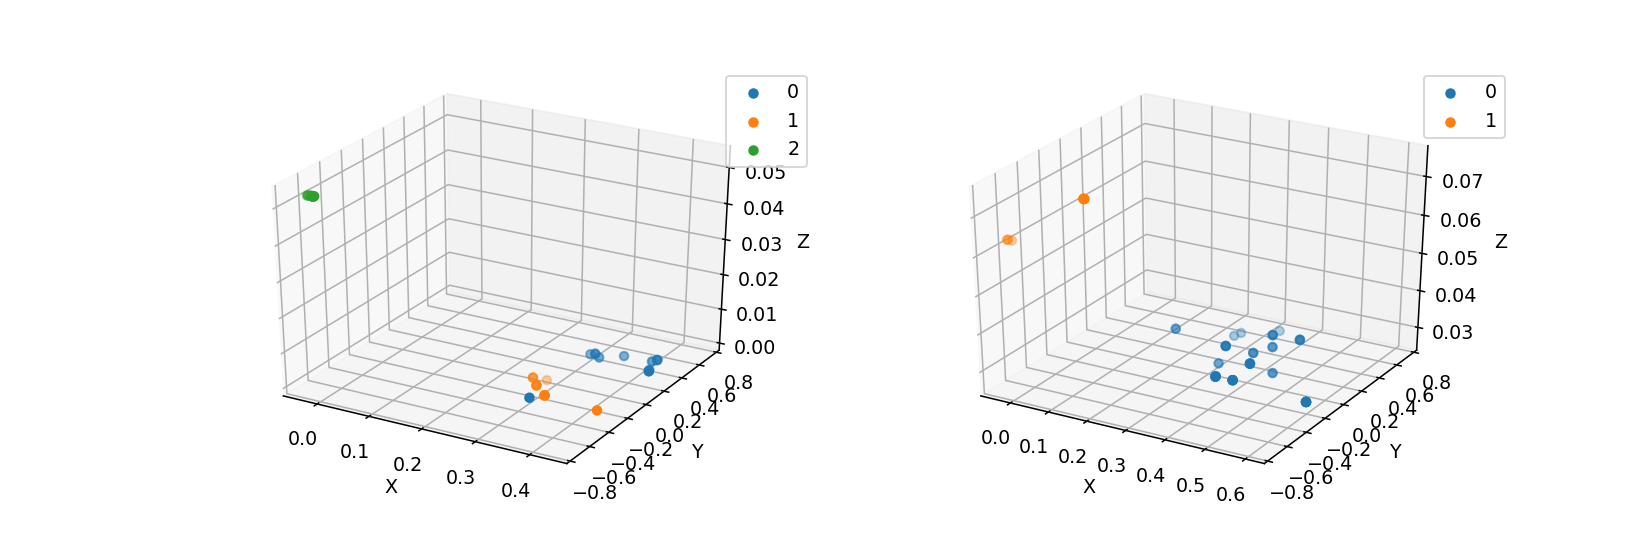

In [12]:
labels_bolt = ['bolt on table', 'bolt assembled', 'bolt in jig']
labels_nut = ['nut in jig', 'nut on table']

fig = plt.figure(2, (12,4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut, nut_ssp_p_norm_clustering)
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot(ax, coord_bolt, bolt_ssp_p_norm_clustering)
plt.savefig('../figures/ssp_p_norm_clustering')


## Euclidean distance

In [13]:
thres = 0.85

bolt_ssp_euclidean_clustering = clustering(bolt_ssp_euclidean_distance, thres)
nut_ssp_euclidean_clustering = clustering(nut_ssp_euclidean_distance, thres)

In [14]:
print(max(nut_ssp_euclidean_clustering),max(bolt_ssp_euclidean_clustering))

2 1


<IPython.core.display.Javascript object>


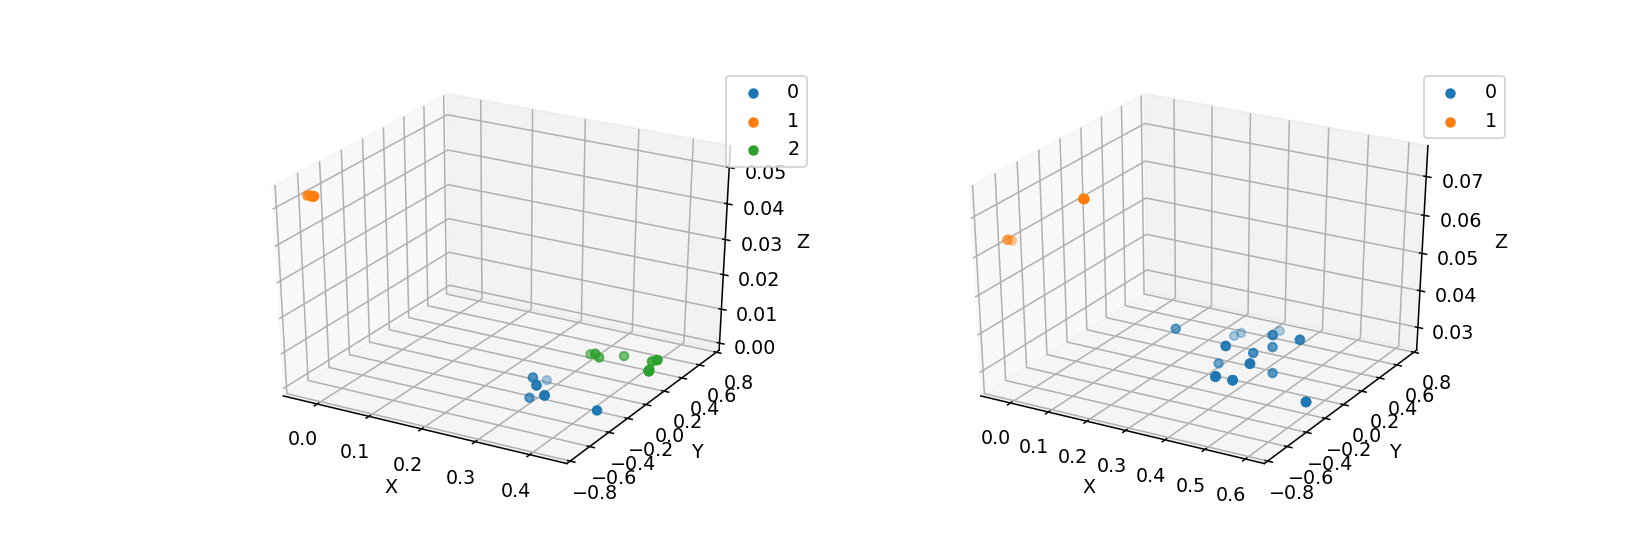

In [16]:
labels_bolt = ['bolt on table', 'bolt assembled', 'bolt in jig']
labels_nut = ['nut in jig', 'nut on table']

fig = plt.figure(3, (12,4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut, nut_ssp_euclidean_clustering)
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot(ax, coord_bolt, bolt_ssp_euclidean_clustering)
plt.savefig('../figures/ssp_euclidean_clustering')

## Cosine distance

In [33]:
thres = 1.02

bolt_ssp_cos_clustering = clustering(bolt_ssp_cos_distance, thres)
nut_ssp_cos_clustering = clustering(nut_ssp_cos_distance, thres)

In [34]:
print( max(nut_ssp_cos_clustering),max(bolt_ssp_cos_clustering))

1 2


<IPython.core.display.Javascript object>


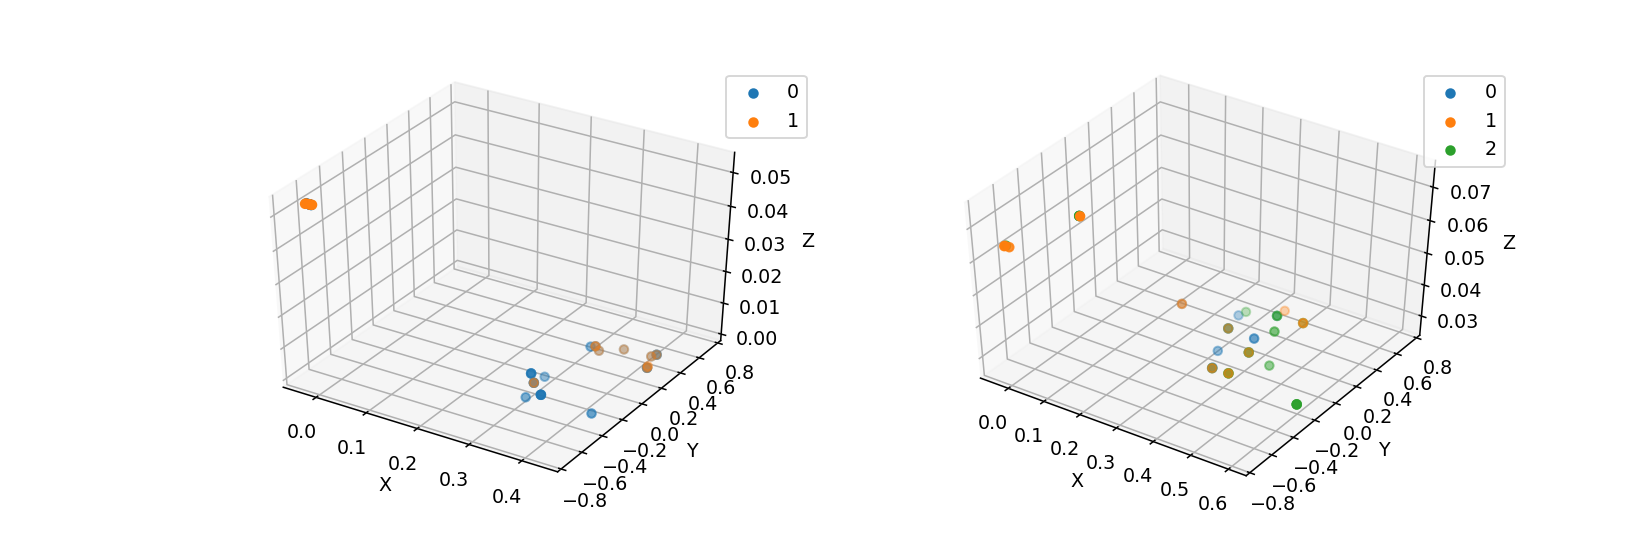

In [36]:
labels_bolt = ['bolt on table', 'bolt assembled', 'bolt in jig']
labels_nut = ['nut in jig', 'nut on table']

fig = plt.figure(4, (12,4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut, nut_ssp_cos_clustering)
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot(ax, coord_bolt, bolt_ssp_cos_clustering)
plt.savefig('../figures/ssp_cos_clustering')

# SSP encoding with object kind

In [40]:
import nengo.spa as spa

dim = 256
bolt_sp = spa.SemanticPointer(data = random_vectors(dim, 1).flatten())
nut_sp = spa.SemanticPointer(data = random_vectors(dim, 1).flatten())

bolt_ssp = encode_dataset(coord_bolt, x_axis_sp, y_axis_sp, z_axis_sp, bolt_sp)
bolt_ssp_p_norm_distance = p_norm_distance(bolt_ssp, p = -3)
bolt_ssp_euclidean_distance = p_norm_distance(bolt_ssp, p = 2)
bolt_ssp_cos_distance = cos_distance(bolt_ssp)

nut_ssp = encode_dataset(coord_nut, x_axis_sp, y_axis_sp, z_axis_sp, nut_sp)
nut_ssp_p_norm_distance = p_norm_distance(nut_ssp, p = -3)
nut_ssp_euclidean_distance = p_norm_distance(nut_ssp, p = 2)
nut_ssp_cos_distance = cos_distance(nut_ssp)

..\utils\distances.py:10: RuntimeWarning: divide by zero encountered in power
  distances[i,j] = np.sum(difference ** p) ** (1 / p)


<IPython.core.display.Javascript object>


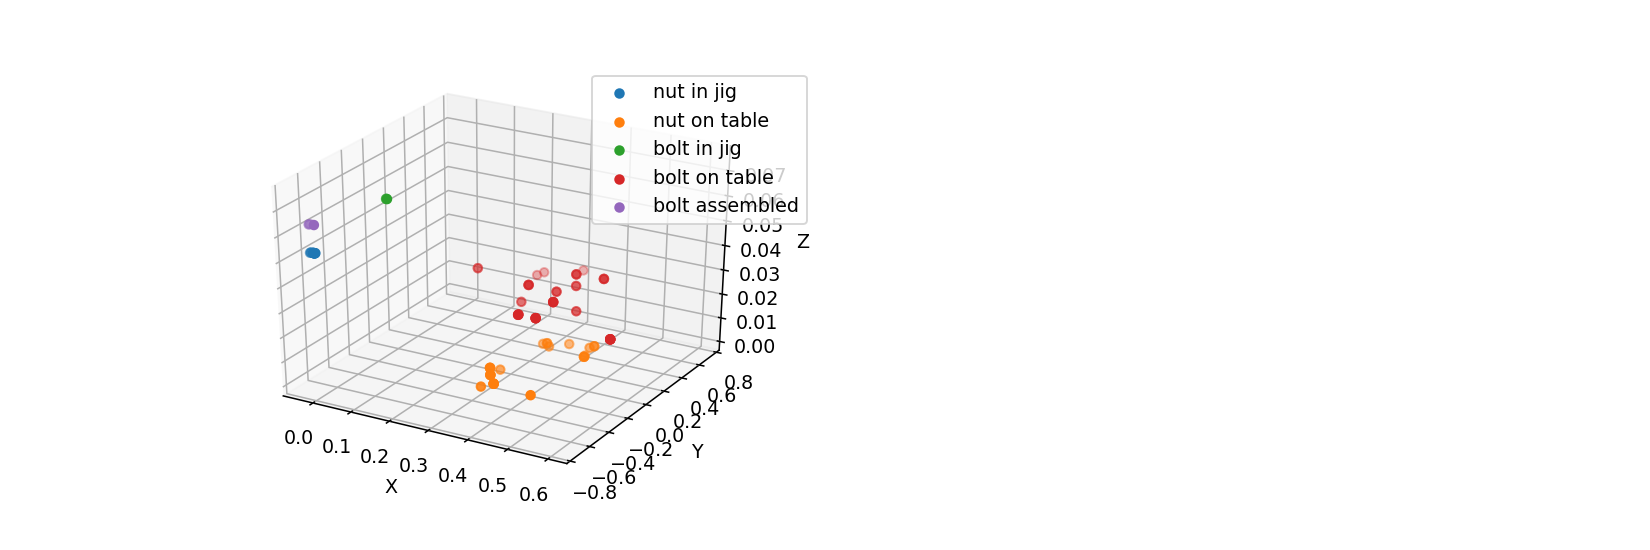

In [53]:
labels_bolt = ['bolt on table', 'bolt assembled', 'bolt in jig']
labels_nut = ['nut in jig', 'nut on table']

fig = plt.figure(5, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, coord_nut, estimated_labels_nut)
plot(ax, coord_bolt, estimated_labels_bolt)
plt.savefig('../figures/2d_pnorm_object')

In [43]:
import numpy as np
data = np.concatenate((coord_nut, coord_bolt), axis = 0)
data_ssp = np.concatenate((nut_ssp, bolt_ssp), axis = 0)


In [44]:
data_ssp_p_norm_distance = p_norm_distance(data_ssp, p = -3)
data_ssp_euclidean_distance = p_norm_distance(data_ssp, p = 2)
data_ssp_cos_distance = cos_distance(data_ssp)


## p-norm

In [54]:
thres = 0.00019
data_ssp_p_norm_clustering = clustering(data_ssp_p_norm_distance, thres)
print(max(data_ssp_p_norm_clustering))

5


<IPython.core.display.Javascript object>


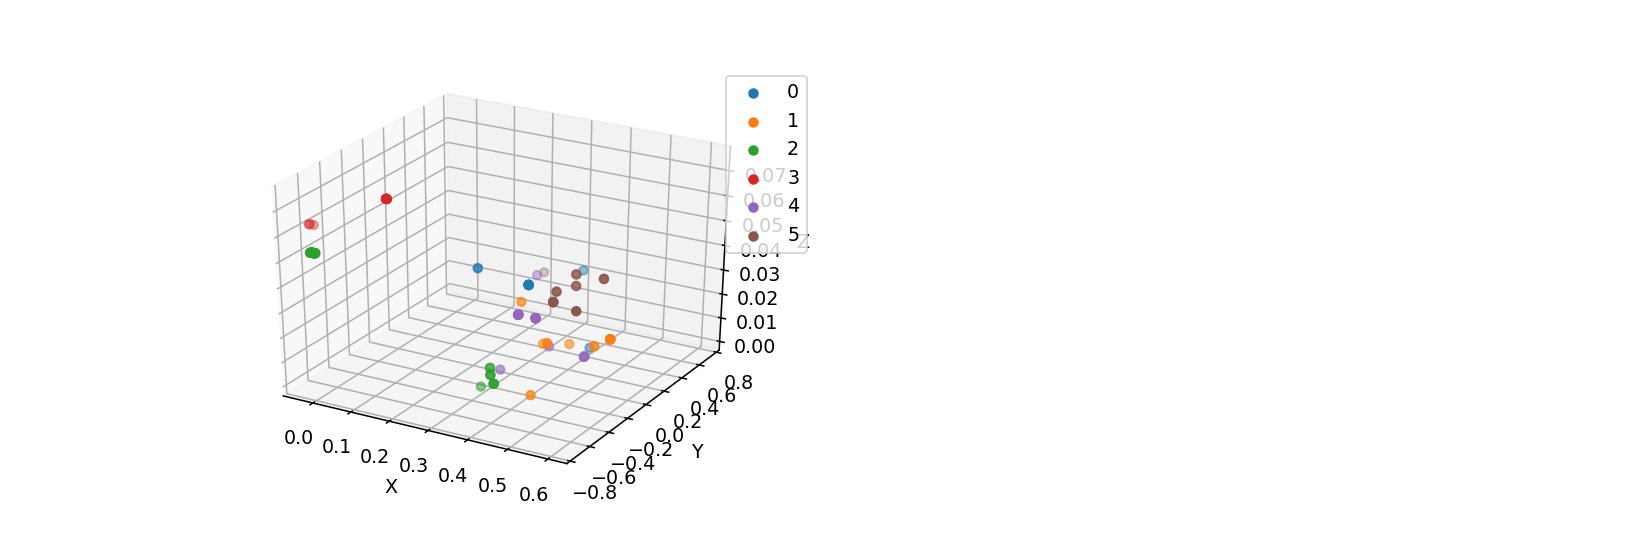

In [55]:
fig = plt.figure(6, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, data, data_ssp_p_norm_clustering)
plt.savefig('../figures/ssp_pnorm_object')

## Euclidean

In [56]:
thres = 0.75

data_ssp_euclidean_clustering = clustering(data_ssp_euclidean_distance, thres)
print(max(data_ssp_euclidean_clustering))

5


<IPython.core.display.Javascript object>


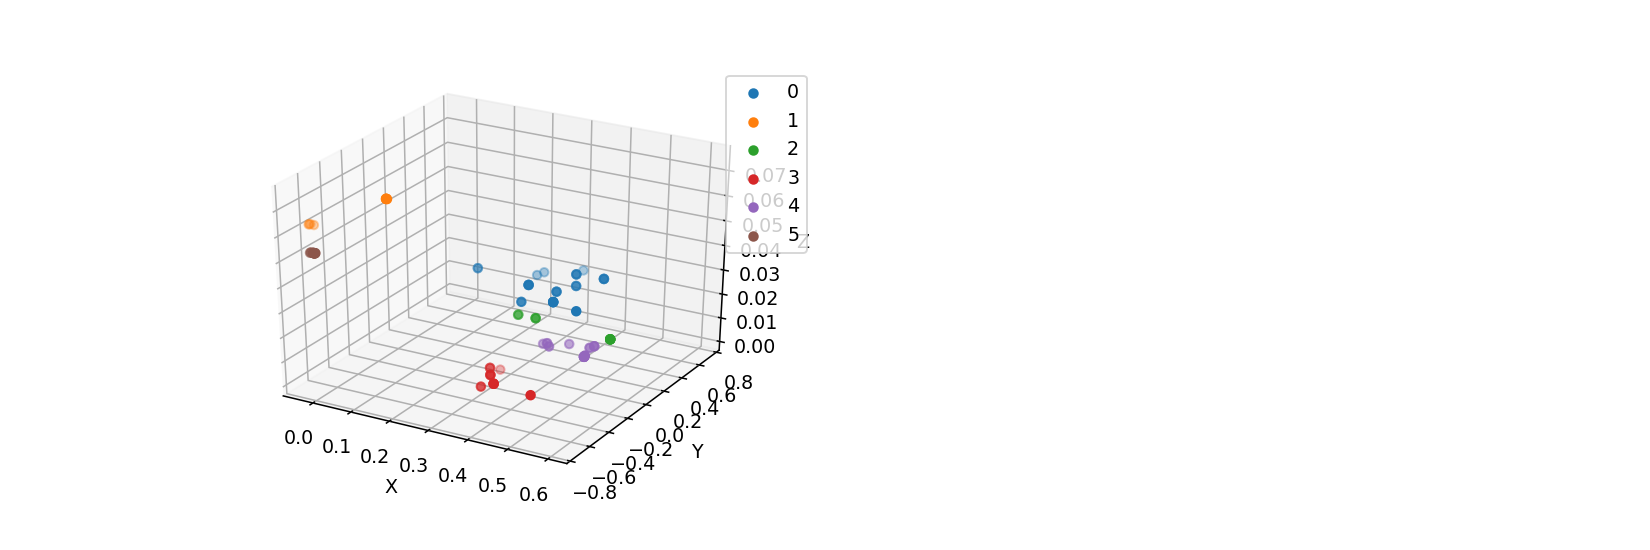

In [57]:
fig = plt.figure(7, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, data, data_ssp_euclidean_clustering)
plt.savefig('../figures/ssp_euclidean_object')

## Cosine

In [60]:
thres = 0.96
data_ssp_cos_clustering = clustering(data_ssp_cos_distance, thres)
print(max(data_ssp_cos_clustering))

5


<IPython.core.display.Javascript object>


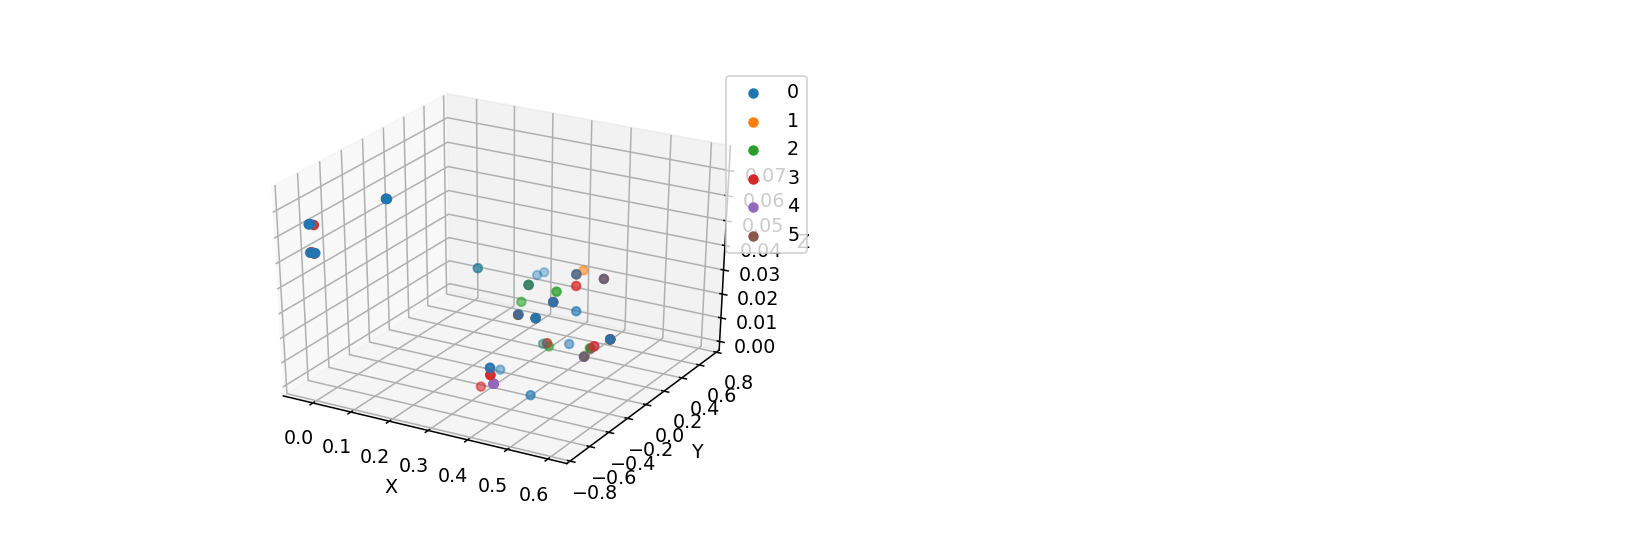

In [62]:
fig = plt.figure(8, (12,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot(ax, data, data_ssp_cos_clustering)
plt.savefig('../figures/ssp_cos_object')